# Analysis of Apple stock 2016 - 2022

In [6]:
!pip install matplotlib
from matplotlib import dates
import matplotlib.pyplot as plt
import  numpy as np
import pandas as pd
import yfinance as yf

You should consider upgrading via the '/Users/swaley/Downloads/my-projects/jupyter-projects/venv/bin/python3 -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'pandas'

In [ ]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
raw = yf.download('SPY AAPL', start='2016-01-01', end='2022-12-31')

[*********************100%***********************]  2 of 2 completed


In [ ]:
raw

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2016-01-04   24.041489  176.563538   26.337500  201.020004   26.342501   
2016-01-05   23.439024  176.862228   25.677500  201.360001   26.462500   
2016-01-06   22.980330  174.631180   25.174999  198.820007   25.592501   
2016-01-07   22.010452  170.441528   24.112499  194.050003   25.032499   
2016-01-08   22.126839  168.570679   24.240000  191.919998   24.777500   
...                ...         ...         ...         ...         ...   
2022-12-23  131.477127  381.454193  131.860001  382.910004  132.419998   
2022-12-27  129.652435  379.949921  130.029999  381.399994  131.410004   
2022-12-28  125.674026  375.227936  126.040001  376.660004  131.029999   
2022-12-29  129.233658  381.982178  129.610001  383.440002  130.479996   
2022-12-30  129.552719  380.975983  129.929993  382.429993  129.949997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2016-01-04  201.029999   25.500000  198.589996   25.652500  200.490005   
2016-01-05  201.899994   25.602501  200.050003   26.437500  201.399994   
2016-01-06  200.059998   24.967501  197.600006   25.139999  198.339996   
2016-01-07  197.440002   24.107500  193.589996   24.670000  195.330002   
2016-01-08  195.850006   24.190001  191.580002   24.637501  195.190002   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

               Volume             
                 AAPL        SPY  
Date                              
2016-01-04  270597600  222353500  
2016-01-05  223164000  110845800  
2016-01-06  273829600  152112600  
2016-01-07  324377600  213436100  
2016-01-08  283192000  209817200  
...               ...        ...  
2022-12-23   63814900   59857300  
2022-12-27   69007800   51638200  
2022-12-28   85438400   70911500  
2022-12-29   75703700   66970900  
2022-12-30   77034200   84022200  

[1762 rows x 12 columns]

In [ ]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [ ]:
raw.pipe?

In [ ]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df
(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
)


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500,270597600
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999,273829600
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000
...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400


In [ ]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0]for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2016-01-01', end='2022-12-31')
    
    return (raw
           .iloc[:, ::2]
           .pipe(fix_cols)
           )

tweak_data()

[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-01-04,24.041481,26.337500,26.342501,25.500000,25.652500,270597600
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000
2016-01-06,22.980331,25.174999,25.592501,24.967501,25.139999,273829600
2016-01-07,22.010456,24.112499,25.032499,24.107500,24.670000,324377600
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000
...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400


# Line Plot

In [ ]:
(raw)

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2016-01-04   24.041489  176.563538   26.337500  201.020004   26.342501   
2016-01-05   23.439024  176.862228   25.677500  201.360001   26.462500   
2016-01-06   22.980330  174.631180   25.174999  198.820007   25.592501   
2016-01-07   22.010452  170.441528   24.112499  194.050003   25.032499   
2016-01-08   22.126839  168.570679   24.240000  191.919998   24.777500   
...                ...         ...         ...         ...         ...   
2022-12-23  131.477127  381.454193  131.860001  382.910004  132.419998   
2022-12-27  129.652435  379.949921  130.029999  381.399994  131.410004   
2022-12-28  125.674026  375.227936  126.040001  376.660004  131.029999   
2022-12-29  129.233658  381.982178  129.610001  383.440002  130.479996   
2022-12-30  129.552719  380.975983  129.929993  382.429993  129.949997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2016-01-04  201.029999   25.500000  198.589996   25.652500  200.490005   
2016-01-05  201.899994   25.602501  200.050003   26.437500  201.399994   
2016-01-06  200.059998   24.967501  197.600006   25.139999  198.339996   
2016-01-07  197.440002   24.107500  193.589996   24.670000  195.330002   
2016-01-08  195.850006   24.190001  191.580002   24.637501  195.190002   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

               Volume             
                 AAPL        SPY  
Date                              
2016-01-04  270597600  222353500  
2016-01-05  223164000  110845800  
2016-01-06  273829600  152112600  
2016-01-07  324377600  213436100  
2016-01-08  283192000  209817200  
...               ...        ...  
2022-12-23   63814900   59857300  
2022-12-27   69007800   51638200  
2022-12-28   85438400   70911500  
2022-12-29   75703700   66970900  
2022-12-30   77034200   84022200  

[1762 rows x 12 columns]

In [ ]:
(raw
    .iloc[:, :-2:2]
    .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open
Date,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501
...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998


<AxesSubplot:xlabel='Date'>

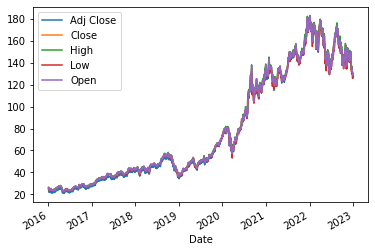

In [ ]:
(raw
    .iloc[:, :-2:2]
    .pipe(fix_cols)
    .plot()
)

<AxesSubplot:xlabel='Date'>

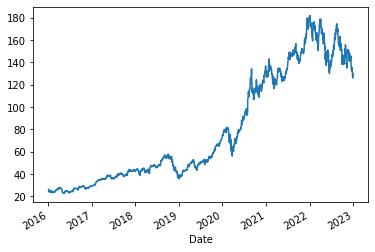

In [ ]:
(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .Close
    .plot()
)

<AxesSubplot:xlabel='Date'>

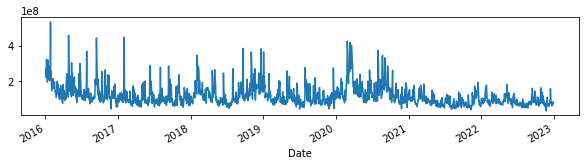

In [ ]:
(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .Volume
    .plot(figsize=(10,2))
)

In [ ]:
(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('M')
    .Close
    .mean()
)

Date
2016-01-31     24.607237
2016-02-29     23.936625
2016-03-31     26.066818
2016-04-30     26.684762
2016-05-31     23.743690
                 ...    
2022-08-31    166.885218
2022-09-30    153.002856
2022-10-31    145.013333
2022-11-30    145.843331
2022-12-31    137.876666
Freq: M, Name: Close, Length: 84, dtype: float64

<AxesSubplot:xlabel='Date'>

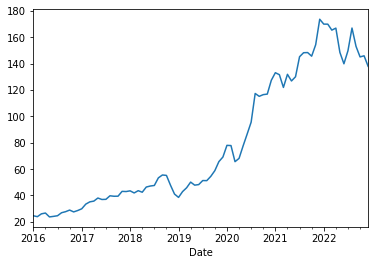

In [ ]:
(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('M')
    .Close
    .mean()
    .plot()
)

<AxesSubplot:xlabel='Date'>

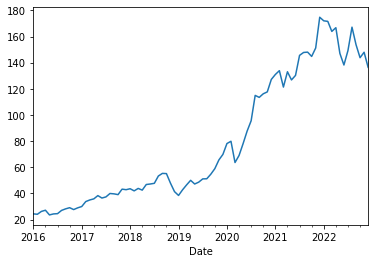

In [ ]:
(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('M')
    .Close
    .median()
    .plot()
)

(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('M')
    .Close
    .median()

)

# Candlestick plot

,Open,High,Low,Close
Date,,,,
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,38.722500,39.712502,38.557499,39.480000
2019-01-03,35.994999,36.430000,35.500000,35.547501
2019-01-04,36.132500,37.137501,35.950001,37.064999
2019-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-06-26,49.442501,50.247501,49.337502,49.950001
2019-06-27,50.072498,50.392502,49.892502,49.935001
2019-06-28,49.669998,49.875000,49.262501,49.480000


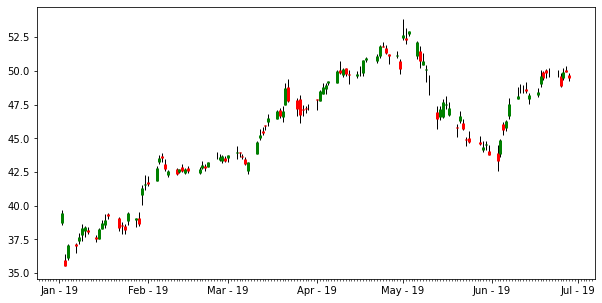

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
def plot_candle(df, ax):
    # wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    #red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    #green - increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b - %y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df


(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('d')
    .agg({'Open': 'first', 'High': 'max', 'Low':'min', 'Close': 'last'})
    .loc['jan 2019':'jun 2019']
    .pipe(plot_candle, ax)
)

In [ ]:
(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('d')
    .agg({'Open': 'first', 'High': 'max', 'Low':'min', 'Close': 'last'})
    .loc['sep 2021':'dec 2021']
    .pipe(plot_candle, ax)
)

,Open,High,Low,Close
Date,,,,
2021-09-01,152.830002,154.979996,152.339996,152.509995
2021-09-02,153.869995,154.720001,152.399994,153.649994
2021-09-03,153.759995,154.630005,153.089996,154.300003
2021-09-04,NaN,NaN,NaN,NaN
2021-09-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002
2021-12-28,180.160004,181.330002,178.529999,179.289993
2021-12-29,179.330002,180.630005,178.139999,179.380005


,Open,High,Low,Close
Date,,,,
2021-09-01,152.830002,154.979996,152.339996,152.509995
2021-09-02,153.869995,154.720001,152.399994,153.649994
2021-09-03,153.759995,154.630005,153.089996,154.300003
2021-09-04,NaN,NaN,NaN,NaN
2021-09-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002
2021-12-28,180.160004,181.330002,178.529999,179.289993
2021-12-29,179.330002,180.630005,178.139999,179.380005


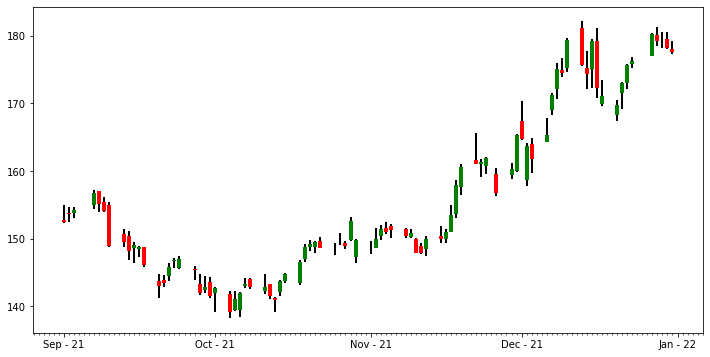

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
def plot_candle(df, ax):
    # wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=2)
    #red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=4)
    #green - increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=4)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b - %y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df


(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('d')
    .agg({'Open': 'first', 'High': 'max', 'Low':'min', 'Close': 'last'})
    .loc['sep 2021':'dec 2021']
    .pipe(plot_candle, ax)
)

,Open,High,Low,Close
Date,,,,
2021-09-01,152.830002,154.979996,152.339996,152.509995
2021-09-02,153.869995,154.720001,152.399994,153.649994
2021-09-03,153.759995,154.630005,153.089996,154.300003
2021-09-04,NaN,NaN,NaN,NaN
2021-09-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002
2021-12-28,180.160004,181.330002,178.529999,179.289993
2021-12-29,179.330002,180.630005,178.139999,179.380005


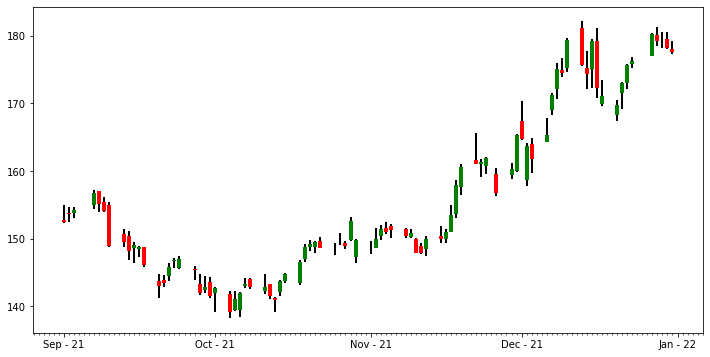

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
    .resample('d')
    .agg({'Open': 'first', 'High': 'max', 'Low':'min', 'Close': 'last'})
    .loc['sep 2021':'dec 2021']
    .pipe(plot_candle, ax)
)

# Returns

In [ ]:
aapl = (raw
    .iloc[:, ::2]
    .pipe(fix_cols))
aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500,270597600
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999,273829600
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000
...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400


In [ ]:
#return
aapl.pct_change?

In [ ]:
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.025059,0.004555,0.004020,0.030601,-0.175292
2016-01-06,-0.019570,-0.019570,-0.032877,-0.024802,-0.049078,0.227033
2016-01-07,-0.042205,-0.042205,-0.021881,-0.034445,-0.018695,0.184597
2016-01-08,0.005288,0.005288,-0.010187,0.003422,-0.001317,-0.126968
...,...,...,...,...,...,...
2022-12-23,-0.002798,-0.002798,-0.015904,-0.005065,-0.025530,-0.180306
2022-12-27,-0.013878,-0.013878,-0.007627,-0.007097,0.003514,0.081374
2022-12-28,-0.030685,-0.030685,-0.002892,-0.022141,-0.013016,0.238098


# Plotting returns


<AxesSubplot:xlabel='Date'>

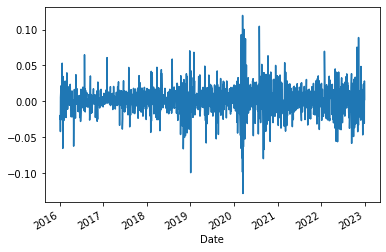

In [ ]:
#Plot returns
(aapl
 .pct_change()
 .Close
 .plot()
)

<AxesSubplot:>

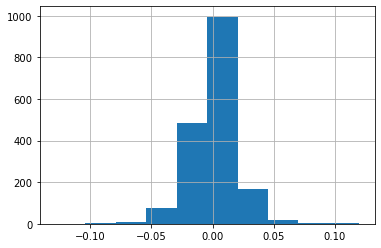

In [ ]:
#Histogram of returns
(aapl
 .pct_change()
 .Close
 .hist()
)

<AxesSubplot:>

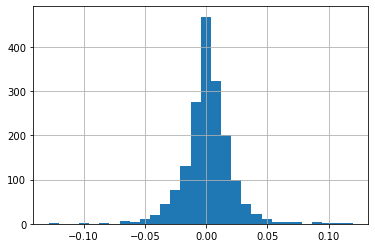

In [ ]:
#Change returns
(aapl
 .pct_change()
 .Close
 .hist(bins=30)
)

<AxesSubplot:xlabel='Date'>

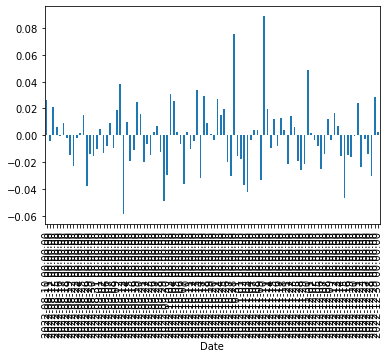

In [ ]:
#Understanding plotting in Pandas is a huge lever
# Bar plot returns
(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar()
)

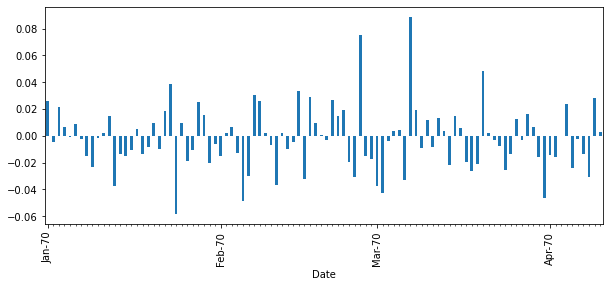

In [ ]:
# Bar plot returns
#sadly dates are broken with Pandas bar plots
#1970s?
fig, ax = plt.subplots(figsize=(10,4))
(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar(ax=ax)
 
)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

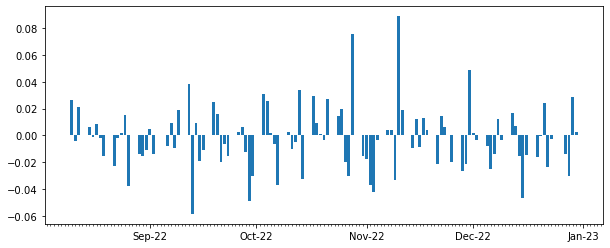

In [ ]:
#Returns - using matplotlib
def my_bar(ser,ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser


fig, ax = plt.subplots(figsize=(10, 4))
_ = (aapl
   .pct_change()
   .Close
   .iloc[-100:]
   .pipe(my_bar, ax))

# Cumulative returns


<AxesSubplot:xlabel='Date'>

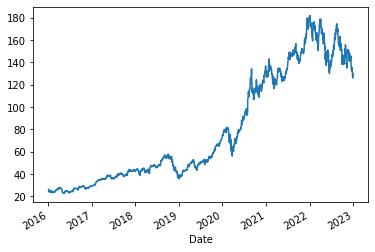

In [ ]:
 (aapl
.Close
.plot()
)

<AxesSubplot:xlabel='Date'>

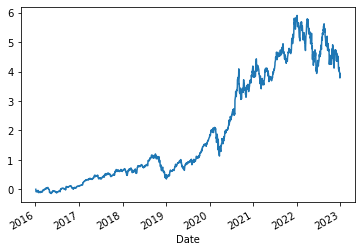

In [ ]:
(aapl
.Close
.sub(aapl.Close[0])
.div(aapl.Close[0])
.plot()
)

<AxesSubplot:xlabel='Date'>

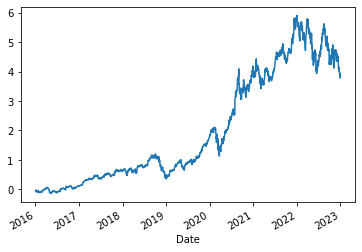

In [ ]:
#alt calc
(aapl
.Close
.pct_change()
.add(1)
.cumprod()
.sub(1)
.plot()
)

In [ ]:
aapl.cumprod??

In [ ]:
pd.core.generic.NDFrame.cumprod??

In [ ]:
np.cumprod??

<AxesSubplot:xlabel='Date'>

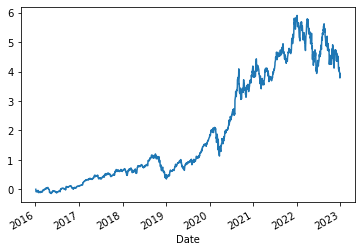

In [ ]:
#create a function for calcuating
def calc_cum_returns(df, col):
    ser = df[col]
    return (ser
           .sub(ser[0])
           .div(ser[0])
           )
(aapl
.pipe(calc_cum_returns,'Close')
.plot()
)

In [ ]:
#Lambda is an *anon function*

def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(aapl)

Date
2016-01-04    0.000000
2016-01-05   -0.025059
2016-01-06   -0.044139
2016-01-07   -0.084480
2016-01-08   -0.079639
                ...   
2022-12-23    4.006550
2022-12-27    3.937067
2022-12-28    3.785572
2022-12-29    3.921120
2022-12-30    3.933270
Name: Close, Length: 1762, dtype: float64

In [ ]:
#Lambda is an *anon function*

(lambda df: get_returns(df))(aapl)

Date
2016-01-04    0.000000
2016-01-05   -0.025059
2016-01-06   -0.044139
2016-01-07   -0.084480
2016-01-08   -0.079639
                ...   
2022-12-23    4.006550
2022-12-27    3.937067
2022-12-28    3.785572
2022-12-29    3.921120
2022-12-30    3.933270
Name: Close, Length: 1762, dtype: float64

In [ ]:
#create a new column
(aapl
.assign(cum_returns=lambda df:calc_cum_returns(df, 'Close'))
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500,270597600,0.000000
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000,-0.025059
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999,273829600,-0.044139
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600,-0.084480
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000,-0.079639
...,...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900,4.006550
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800,3.937067
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400,3.785572


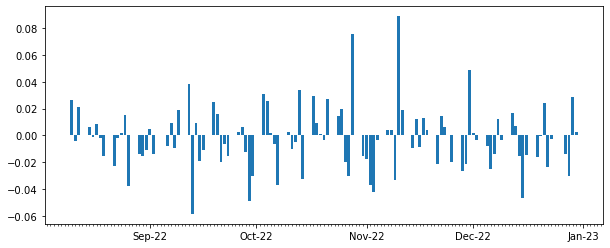

In [ ]:
#Returns - using matplotlib

def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10, 4))
_ = (aapl
   .pct_change()
   .Close
   .iloc[-100:]
   .pipe(my_bar, ax))

# Volatility

In [ ]:
(aapl
.Close
.mean()
)

79.19187852121239

In [ ]:
(aapl
.Close
.std()
)

In [ ]:
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.pct_change_close
.std()
)

In [ ]:
(aapl
.assign(close_vol=aapl.rolling(30).Close.std(),
       per_vol=aapl.Close.pct_change().rolling(30).std())
.iloc[:, -2:]
.plot(subplots=True)
)

In [ ]:
#15 day volatility
(aapl
.assign(pct_change_close=aapl.Close.pct_change()
.resmaple('15D')
.std())

In [ ]:
#15 day rolling volatility
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.rolling(window=15,min_periods=15)
.std()
)

In [ ]:
#15 day volatility 
#note if column name conflicts with method need to use
#index access
(aapl
.assign(pct_change=aapl.Close.pct_change())
.rollimg(window=15, min_periods=15)
.std()
['pct_change']
.plot()
)

In [ ]:
#30 day rolling volatility
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.rolling(window=30,min_periods=30)
.std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-23,6.377848,6.396421,6.177172,6.240945,6.106205,2.171304e+07,0.019061
2022-12-27,6.733166,6.752774,6.642878,6.651315,6.507639,2.152227e+07,0.018657
2022-12-28,7.325468,7.346802,7.038636,7.102835,6.885521,2.157858e+07,0.019244


<AxesSubplot:xlabel='Date'>

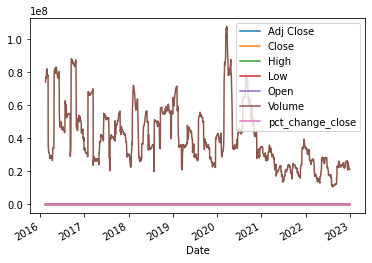

In [ ]:
#30 day rolling volatility
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.rolling(window=30,min_periods=30)
.std()
.plot()
)

<AxesSubplot:xlabel='Date'>

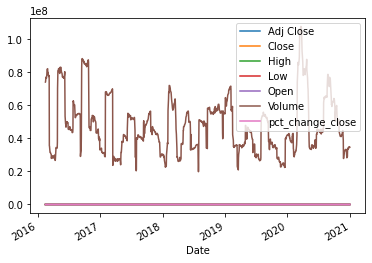

In [ ]:
#30 day rolling volatility
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.rolling(window=30,min_periods=30)
.std()
.loc['2016':'2020']
.plot()
)

# Simple Moving Average

In [ ]:
(aapl
  .assign(s1=aapl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:,['Close', 's1', 's2']].mean(axis='columns'),
         ma3_builtin=aapl.Close.rolling(3).mean()
         )
)

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500,270597600,NaN,NaN,26.337500,NaN
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000,26.337500,NaN,26.007500,NaN
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999,273829600,25.677500,26.337500,25.730000,25.730000
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600,25.174999,25.677500,24.988333,24.988333
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000,24.112499,25.174999,24.509166,24.509166
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900,132.229996,135.449997,133.179998,133.179998
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800,131.860001,132.229996,131.373332,131.373332
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400,130.029999,131.860001,129.310000,129.310000


# Moving Averages Plotting 

<AxesSubplot:xlabel='Date'>

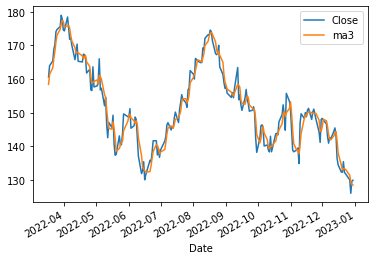

In [ ]:
(aapl
  .assign(s1=aapl.Close.shift(1),
         s2=aapl.Close.shift(2),
         ma3=lambda df_:df_.loc[:,['Close', 's1', 's2']].mean(axis='columns'),
         ma3_builtin=aapl.Close.rolling(3).mean()
         )
 [['Close', 'ma3']]
 .iloc[-200:]
 .plot()
)

<AxesSubplot:xlabel='Date'>

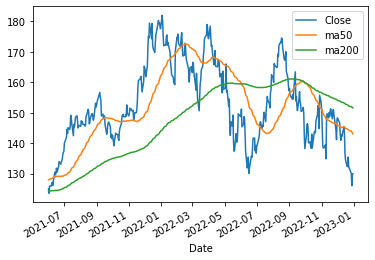

In [ ]:
(aapl
.assign(
        ma50=aapl.Close.rolling(50).mean(),
        ma200=aapl.Close.rolling(200).mean(),
        )
[['Close','ma50','ma200']]
 .iloc[-400:]
 .plot()
)

In [ ]:
aapl.ewm??


<AxesSubplot:xlabel='Date'>

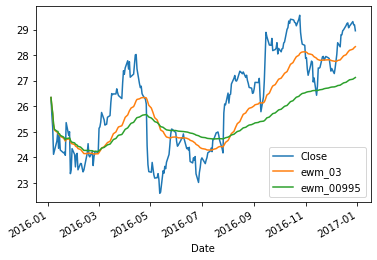

In [ ]:
(aapl
 .assign(ewm_03=aapl.Close.ewm(alpha=0.0392).mean(),
        ewm_00995=aapl.Close.ewm(alpha=0.00995).mean(),
        )

.loc['2016':'2016', ['Close', 'ewm_03', 'ewm_00995']]
 .plot()
)

# Technical Analysis


# On-balance Volume (OBV)

In [ ]:
aapl.Close

Date
2016-01-04     26.337500
2016-01-05     25.677500
2016-01-06     25.174999
2016-01-07     24.112499
2016-01-08     24.240000
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, Length: 1762, dtype: float64

In [ ]:
aapl.Close.shift(1)

Date
2016-01-04           NaN
2016-01-05     26.337500
2016-01-06     25.677500
2016-01-07     25.174999
2016-01-08     24.112499
                 ...    
2022-12-23    132.229996
2022-12-27    131.860001
2022-12-28    130.029999
2022-12-29    126.040001
2022-12-30    129.610001
Name: Close, Length: 1762, dtype: float64

In [ ]:
#naive

def calc_obv(df):
    df = df.copy()
    df["OBV"] = 0.0
    
    #loop through the data and calculate OBV
    
    for i in range(1, len(df)):
        if df["Close"][i] > df["Close"][i-1]:
            df["OBV"][i] = df["OBV"][i-1] + df["Volume"][i]
        elif df["Close"][i] < df["Close"][i-1]:
            df["OBV"][i] = df["OBV"][i-1] - df["Volume"][i]
        
        else:
            df["OBV"][i] = df["OBV"][i-1]
    return df

calc_obv(aapl)

/var/folders/nb/m5d_ywkn40d5jnxr_sdvvzxc0000gn/T/ipykernel_86196/2465545755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] - df["Volume"][i]
/var/folders/nb/m5d_ywkn40d5jnxr_sdvvzxc0000gn/T/ipykernel_86196/2465545755.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] + df["Volume"][i]
/var/folders/nb/m5d_ywkn40d5jnxr_sdvvzxc0000gn/T/ipykernel_86196/2465545755.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,Adj Close,Close,High,Low,Open,Volume,OBV
Date,,,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500,270597600,0.000000e+00
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000,-2.231640e+08
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999,273829600,-4.969936e+08
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600,-8.213712e+08
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000,-5.381792e+08
...,...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900,5.298688e+09
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800,5.229680e+09
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400,5.144242e+09


In [ ]:
%%timeit
calc_obv(aapl)

/var/folders/nb/m5d_ywkn40d5jnxr_sdvvzxc0000gn/T/ipykernel_86196/2465545755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] - df["Volume"][i]
/var/folders/nb/m5d_ywkn40d5jnxr_sdvvzxc0000gn/T/ipykernel_86196/2465545755.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OBV"][i] = df["OBV"][i-1] + df["Volume"][i]
/var/folders/nb/m5d_ywkn40d5jnxr_sdvvzxc0000gn/T/ipykernel_86196/2465545755.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

182 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
aapl.Volume.where?

In [ ]:
%%timeit
#This is painful
(aapl
.assign(close_prev=aapl.Close.shift(1),
       vol=0,
       obv=lambda adf: adf.vol.where(cond=adf.Close == adf.close_prev,
                                    other=adf.Volume.where(cond=adf.Close > adf.close_prev,
                                              other=-adf.Volume.where(cond=adf.Close < adf.close_prev, other=0)
                                     )).cumsum()
       )
)

1.4 ms ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
pd.Series(np.select(condlist=[aapl.Close < 25.6, aapl.Close > 127],
                   choicelist=[25.5, 127], default= 80))

0        80.0
1        80.0
2        25.5
3        25.5
4        25.5
        ...  
1757    127.0
1758    127.0
1759     80.0
1760    127.0
1761    127.0
Length: 1762, dtype: float64

In [ ]:
aapl.Close


Date
2016-01-04     26.337500
2016-01-05     25.677500
2016-01-06     25.174999
2016-01-07     24.112499
2016-01-08     24.240000
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, Length: 1762, dtype: float64

In [ ]:
#This is why lambdas are so useful 
# They give us access to new columns
# (aapl
#  .assign(prev_close=aapl.Close.shift(1),
#         vol=np.select([aapl.Close > aapl.prev_close,
#                       aapl.Close == aapl.prev_close,
#                       aapl.Close < aapl.prev_close],
#                      [aapl.Volume, 0, -aapl.Volume]),
#          obv=lambda df_:df_vol.cumsum(),
#         )
# )

In [ ]:
np.select??

In [ ]:
(aapl
 .assign(vol=np.select([aapl.Close > aapl.Close.shift(1),
                      aapl.Close == aapl.Close.shift(1),
                      aapl.Close < aapl.Close.shift(1)],
                     [aapl.Volume, 0, -aapl.Volume]),
         obv=lambda df_:df_.vol.cumsum(),
        )
)

,Adj Close,Close,High,Low,Open,Volume,vol,obv
Date,,,,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500,270597600,0,0
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000,-223164000,-223164000
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999,273829600,-273829600,-496993600
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600,-324377600,-821371200
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000,283192000,-538179200
...,...,...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900,-63814900,5298688200
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800,-69007800,5229680400
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400,-85438400,5144242000


In [ ]:
def calc_obv(df, close_col='Close', vol_col='Volume'):
    close = df[close_col]
    vol = df[vol_col]
    close_shift = close.shift(1)
    return  (df
            .assign(vol=np.select([close > close_shift,
                                  close == close_shift,
                                  close < close_shift],
                                 [vol, 0, -vol]),
                   obv=lambda df_:df_.vol.fillna(0). cumsum()
                   )
                ['obv']
            )
(aapl
 .assign(obv=calc_obv)
)

,Adj Close,Close,High,Low,Open,Volume,obv
Date,,,,,,,
2016-01-04,24.041489,26.337500,26.342501,25.500000,25.652500,270597600,0
2016-01-05,23.439024,25.677500,26.462500,25.602501,26.437500,223164000,-223164000
2016-01-06,22.980330,25.174999,25.592501,24.967501,25.139999,273829600,-496993600
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600,-821371200
2016-01-08,22.126839,24.240000,24.777500,24.190001,24.637501,283192000,-538179200
...,...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900,5298688200
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800,5229680400
2022-12-28,125.674026,126.040001,131.029999,125.870003,129.669998,85438400,5144242000


In [ ]:
# How I tested this code

test_df = pd.DataFrame({'Close': [10,10.15, 10.17, 10.13, 10.11, 10.15, 10.2, 10.2, 10.22,10.21],
                       'Volume': [25200,30000,25600,32000,23000,40000,36000,20500,23000,27500]})
(test_df
 .assign(obv=calc_obv)
)

,Close,Volume,obv
0,10.00,25200,0
1,10.15,30000,30000
2,10.17,25600,55600
3,10.13,32000,23600
4,10.11,23000,600
5,10.15,40000,40600
6,10.20,36000,76600
7,10.20,20500,76600
8,10.22,23000,99600
9,10.21,27500,72100


# Accumulation/ distribution Indicator (A/D)

In [ ]:
(aapl
 .assign(mfm=((aapl.Close - aapl.Low) - (aapl.High - aapl.Close))/(aapl.High - aapl.Low),
        mfv =lambda df_:df_.mfm * df_.Volume,
        cmfv=lambda df_:df_.mfv.cumsum()
        )
)

In [ ]:
#refactored code
def calc_ad(df, close_col='Close', low_col='Low', high_col='High',
           vol_col='Volume'):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    return (df
           .assign(mfm=((close - low) - (high - close))/ (high - low),
                  mfv=lambda df_:df_.mfm * df_[vol_col],
                  cmfv=lambda df_:df_.mfv.cumsum())
           .cmfv
           )

(appl
 .assign(ad=calc_ad)
 .ad
 .plot()
)

In [ ]:
fig = plt.figure(figsize=(10,8))
#[left, bottom, width, height] quantities.


ax = fig.add_axes((0,.3,1,.7))
ax2 = fig.add_axes((0,0.1,.3))


(aapl
 .assign9ad=calc_ad
 .iloc[-200:])

# RSI

In [ ]:
(aapl
 .assign(change=lambda df:df['Close'].diff(),
        gain=lambda df:df.change.clip(lower=0),
        loss=lambda df:df.change.clip(upper=0),
        avg_gain=lambda df:avg(df, col='gain'),
        avg_loss=lambda df:-avg(df, col='loss'),
        rs=lambda df:df.avg_gain/df.avg_loss,
        RSI =IF(117=0,100,100-(100/(1+J17)))
        rsi=lambda df:np.select([df.avg_loss==0], [100],
                               (100-(100/(1+df.rs))))
        )
)